# Gaussian Process Tutorial

이번 튜토리얼 세션의 목적은 간단한 실습을 통해 Gaussian Process 를 좀더 잘 이해해 보는 것. 그중에서도 우리는 Gaussian Process 의
* Kernel
* 무작위 샘플
* regression model

들을 다룰 것이고 더 나아가 **주식 데이터**에도 적용해보는 시간을 가질 것.


# 1. Setting

- 본 튜토리얼에서는 python 기반 Gaussian Process frame work 인  [GPy](http://sheffieldml.github.io/GPy/) 를 이용.
- GPy 를 이용하기 위해서는 scipy (0.16) 이상 버전이 필요
- [Anaconda](http://continuum.io/downloads) 설치 권장. 설치 후에 GPy 는 다음 명령어로 설치 가능.
     - <code>conda update scipy</code> 
     - <code>pip install GPy</code> 
     
# 2. Kernel and Covairance Function

- 우선 첫째로, one dimension 에서 Squared-exponential kernel (a.k.a. RBF kernel) 을 정의해보자.

$$k_{RBF}(x,x') = \sigma_f^2\exp(\frac{1}{2l^2}|x-x'|^2)$$

- $l$ : length scale
- $\sigma^2$ : output variance 



/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


rbf.,value,constraints,priors
variance,1.0,+ve,
lengthscale,1.0,+ve,


 /usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:1744: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


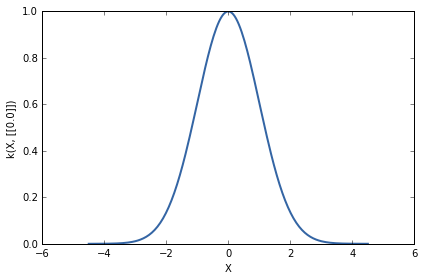

In [1]:
import numpy as np
% matplotlib inline 
import matplotlib
matplotlib.use('Pdf')
from matplotlib import pyplot as plt
import GPy

k_rbf = GPy.kern.RBF(input_dim = 1, variance = 1. , lengthscale= 1.) # By default, the parameters are set to 1.
k_rbf.plot() # plot the kernel
k_rbf

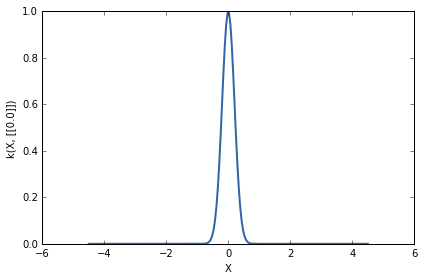

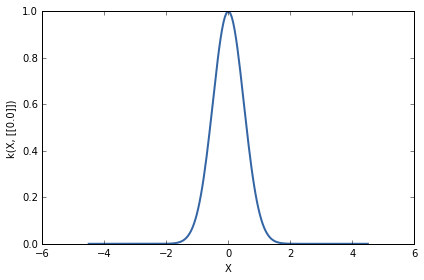

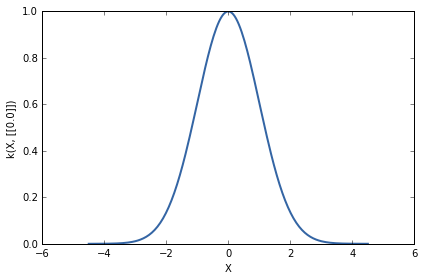

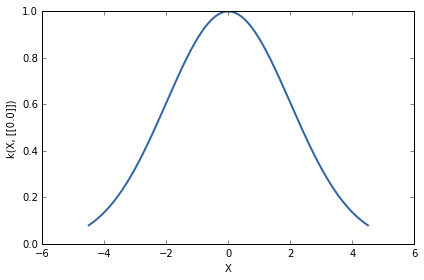

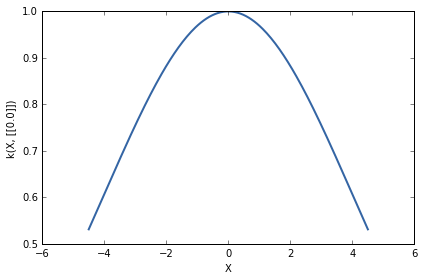

In [2]:
theta_list = np.asarray([0.2,0.5,1.,2.,4.])
for theta in theta_list:
    k_rbf['lengthscale']=theta
    k_rbf.plot()

- Length scale 가 작을수록, 멀리 떨어져 있는 점들의 경우 kernel 값이 0 이 되고 가까이 있는 점들만 예측에 쓰이게 된다.
- $\sigma^2$ 텀은 함수 자체의 variance 의 scale factor 로 볼 수 있다.
- RBF 외에도 다양한 kernel 이 있다.
    - Linear, Bias, PeriodicExponential, Matern32, Matern 52...
    - 궁금한경우 <code>GPy.kern.&lt;tab&gt;</code> 
- 예로, Linear kernel 의 경우에는 이전에 배운 RBF kernel 과 달리 *non-stationary* 하다.
    - 두개의 input 에 대해서 상대적인 거리 뿐만 아니라 절대적인 위치에 따라서 kernel 값이 달라진다.

$$K_{LIN}(x,x') = \sigma_b^2+\sigma_v^2(x-c)(x'-c)$$

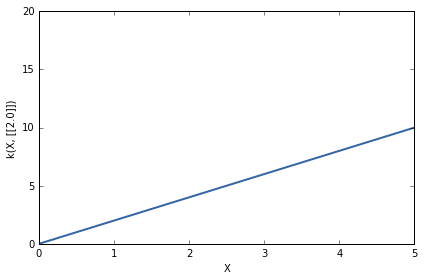

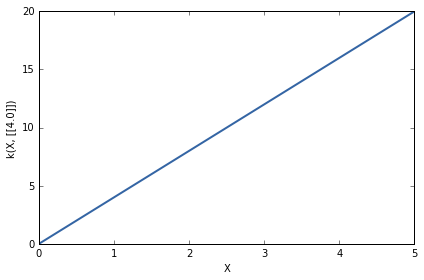

In [3]:
k_lin = GPy.kern.Linear(input_dim=1, variances = 1.)
k_lin.plot(x = 2.,plot_limits=[0,5],ylim = [0,20])
k_lin.plot(x = 4.,plot_limits=[0,5],ylim = [0,20])

- 정의한 Kernel 을 이용해 Gaussian Process 에 사용될 Covariance 를 구해보자.

In [4]:
X = np.array([[1.],[2.],[3.]]) # 3 개의 input 이  1 dimension 에서 각각 1, 2 ,3 에 있을때
C = k_lin.K(X,X)
print C

[[ 1.  2.  3.]
 [ 2.  4.  6.]
 [ 3.  6.  9.]]


- 또한 kernel 끼리 더하거나 곱해서 새로운 kernel을 정의할수 있다.

In [5]:
k_sum = k_lin + k_rbf
k_prod = k_lin * k_rbf

# 3. Sample Paths from a GP
- 우리가 지금까지 정의한 kernel 을 이용하여 Covariance 를 정의한 어떤 그래프들이 나오는지 Sampling 을 통해 살펴보자.


 /usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:15: RuntimeWarning:covariance is not positive-semidefinite.


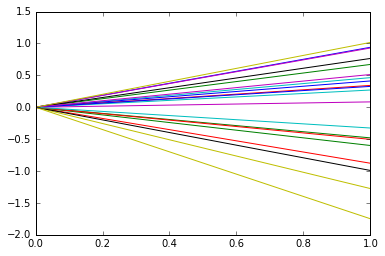

 /usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: RuntimeWarning:covariance is not positive-semidefinite.


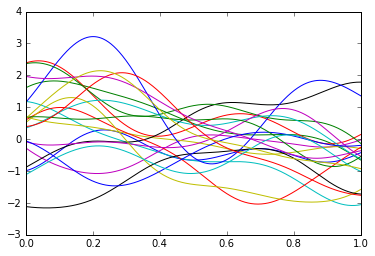

 /usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:32: RuntimeWarning:covariance is not positive-semidefinite.


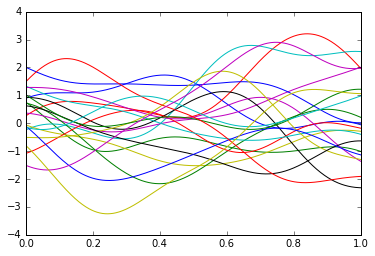

 /usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:40: RuntimeWarning:covariance is not positive-semidefinite.


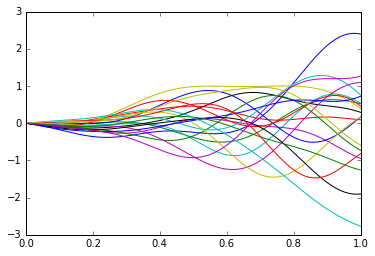

In [6]:
# kernel 정의
k_rbf = GPy.kern.RBF(input_dim = 1, variance = 1. , lengthscale= 0.2) 
k_lin = GPy.kern.Linear(input_dim = 1, variances = 1.)
k_sum = k_lin + k_rbf
k_prod = k_lin * k_rbf

X = np.linspace(0.,1.,500) # [0,1] 사이에 균일한 거리를 둔 500 개의 point 정의
X = X.reshape((-1,1)) # reshape X to make it n*1
mu = np.zeros((500)) # vector of the means


# Linear Kernel
C = k_lin.K(X,X) # covariance matrix
# Generate 20 sample path with mean mu and covariance C
Z = np.random.multivariate_normal(mu,C,20)
for i in range(20):
    plt.plot(X[:],Z[i,:])
plt.show()


# RBF Kernel
C = k_rbf.K(X,X) # covariance matrix
# Generate 20 sample path with mean mu and covariance C
Z = np.random.multivariate_normal(mu,C,20)
for i in range(20):
    plt.plot(X[:],Z[i,:])
plt.show()

# Linear Kernel + RBF Kernel
C = k_sum.K(X,X) # covariance matrix
# Generate 20 sample path with mean mu and covariance C
Z = np.random.multivariate_normal(mu,C,20)
for i in range(20):
    plt.plot(X[:],Z[i,:])
plt.show()

# Linear Kernel + RBF Kernel
C = k_prod.K(X,X) # covariance matrix
# Generate 20 sample path with mean mu and covariance C
Z = np.random.multivariate_normal(mu,C,20)
for i in range(20):
    plt.plot(X[:],Z[i,:])
plt.show()


# 4. Regression


Name : GP regression
Objective : 22.8480289852
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


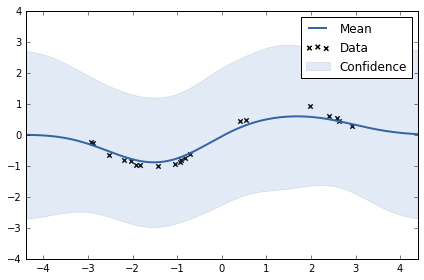

In [7]:
import numpy as np
from matplotlib import pyplot as plt
import GPy

X = np.random.uniform(-3.,3.,(20,1))
# add noise into Y
Y = np.sin(X) + np.random.randn(20,1)*0.05

kernel = GPy.kern.RBF(input_dim=1, variance = 1., lengthscale= 1.)
m = GPy.models.GPRegression(X, Y, kernel)

print(m)
m.plot()

- 위에 그래프에서 짙은 파란색 선은 Gaussian Process 로 얻어진 mean 값을 나타내고,
- 옅은 영역은 95% 신뢰도 구간 이다. ( +/- 2*표준편차)
- 임의의 parameter 는 주어진 data에 적합하지 않을 수 있다.
    - 위에 그림에서 보면 신뢰도 구간이 너무 넓다.
- GPy 에서는 주어진 데이터의 likelihood 를 최대화하는 parameter 를 찾는  <code>m.optimize</code> 지원.


Name : GP regression
Objective : -17.4857967308
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |             value  |  constraints  |  priors
  rbf.variance             |    0.840209769953  |      +ve      |        
  rbf.lengthscale          |     1.78835899006  |      +ve      |        
  Gaussian_noise.variance  |  0.00183346425872  |      +ve      |        


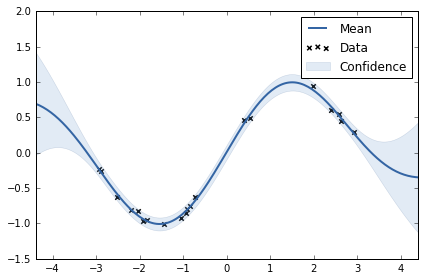

In [8]:
m.optimize()
# m.optimize_restarts(num_restarts = 20)
print(m)
m.plot()

# 5. 주식 데이터에 적용해보기

- 2016 년 11월 주식 가격으로 커널을 학습한 후,
- 12월 가격을 예측해보는 시뮬레이션을 다뤄보자.
- 우선 11월 주가에 Gaussian Process 를 적용해보자.

In [9]:
import pandas as pd
import pandas.io.data as web
from datetime import datetime

code = {'삼성전자' : '005930',
       '한국전력' : '015760',
       '삼성물산' : '028260',
       '현대차' : '005380',
       'SK하이닉스' : '000660',
       'NAVER' : '035420',
       '삼성전자우' : '005935',
       '현대모비스' : '012330',
       '삼성생명' : '032830',
       'POSCO' : '005490',
       '신한지주' : '055550'} # 종목 코드

start = datetime(2016,11,1)
end = datetime(2016,11,30)

# 삼성전자 11월 주식가격 dataframe
df = web.DataReader(code['삼성전자']+'.KS', "yahoo", start, end)

Y_train = df['Adj Close'].values.reshape((-1,1)) # 삼성전자 11월 주식가격
X_train = np.arange(Y_train.shape[0]).reshape((-1,1))  # 간격 균일하게 가정.

- RBF kernel 을 사용할때


Name : GP regression
Objective : 21.3851150941
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |           value  |  constraints  |  priors
  rbf.variance             |     1.318827313  |      +ve      |        
  rbf.lengthscale          |   3.16274412145  |      +ve      |        
  Gaussian_noise.variance  |  0.159061239187  |      +ve      |        


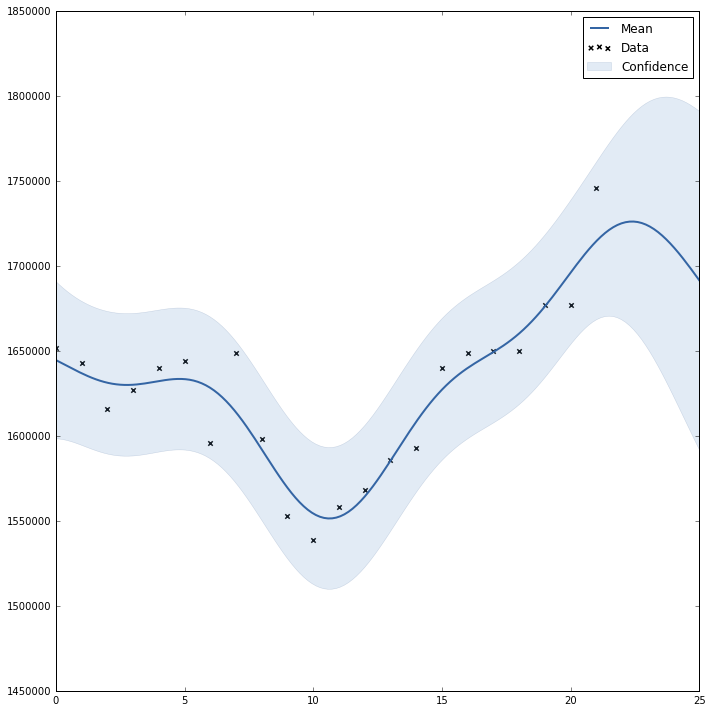

In [10]:
k_rbf = GPy.kern.RBF(input_dim = 1, variance = 1. , lengthscale= 1.)
m_rbf = GPy.models.GPRegression(X_train, Y_train, k_rbf ,normalizer=True)
m_rbf.optimize()
# m.optimize_restarts(num_restarts = 20)
print(m_rbf)
m_rbf.plot(figsize=[10,10],xlim=[0,X_train.shape[0]+3])

- RBF * Linear kernel 을 사용할때


Name : GP regression
Objective : 19.210469516
Number of Parameters : 4
Number of Optimization Parameters : 4
Updates : True
Parameters:
  GP_regression.           |            value  |  constraints  |  priors
  mul.linear.variances     |  0.0914890770901  |      +ve      |        
  mul.rbf.variance         |  0.0914890770901  |      +ve      |        
  mul.rbf.lengthscale      |    3.13776306218  |      +ve      |        
  Gaussian_noise.variance  |   0.154962657872  |      +ve      |        


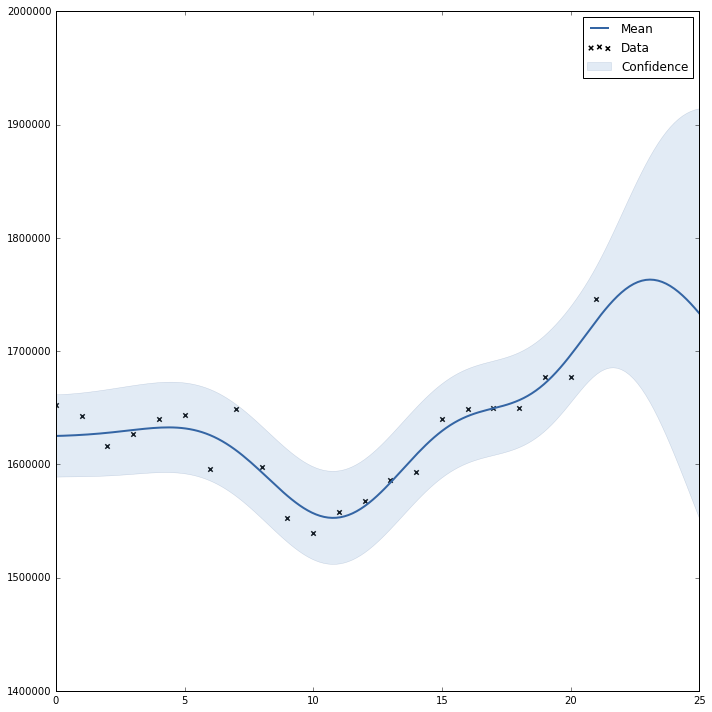

In [11]:
k_rbf = GPy.kern.RBF(input_dim = 1, variance = 1. , lengthscale= 1.) 
k_lin = GPy.kern.Linear(input_dim = 1, variances = 1.)
k_prod = k_lin * k_rbf
m_prod = GPy.models.GPRegression(X_train, Y_train, k_prod ,normalizer=True)
m_prod.optimize()
# m.optimize_restarts(num_restarts = 20)
print(m_prod)
m_prod.plot(figsize=[10,10],xlim=[0,X_train.shape[0]+3])

- 참고로, Gaussian Process model 로 새로운 point 에 대해서 예측은 <code>mean, var = m.predict(X_new)</code> 통해 구할 수 있다.
- 이를 이용하여 다음날 주식 가격이 오를 확률을 Gaussian Process model 에 기반해서 구해보자.

In [12]:
import scipy
pred_mean, pred_var = m_prod.predict(np.reshape(X_train[-1] + 1,(-1,1))) # GP 가 예측하는 다음날의 mean ,var
cdf = scipy.stats.norm(pred_mean,np.sqrt(pred_var)).cdf # cdf 정의
p_dec = cdf(Y_train[-1]) # 전날 대비 내려갈 확률
p_inc = 1-cdf(Y_train[-1]) # 전날 대비 오를 확률
print p_dec, p_inc

[[ 0.4301573]] [[ 0.5698427]]


- 간단한 시뮬레이션을 해보자.
- 전날 대비 오른다고 예측한 확률이 60 % 보다 높으면 가지고 전부를 투자하고,
- 아닌경우 파는 시뮬레이션을 해보자.
- 우선 12월 의 주가 정보를 가져오자.

In [13]:
start = datetime(2016,12,1)
end = datetime(2016,12,30)

# 삼성전자 11월 주식가격 dataframe
df = web.DataReader(code['삼성전자']+'.KS', "yahoo", start, end)

Y_test = df['Adj Close'].values.reshape((-1,1)) # 삼성전자 11월 주식가격
X_test = np.arange(X_train[-1]+1,X_train[-1]+1+Y_test.shape[0]).reshape((-1,1))  # 간격 균일하게 가정.
# print X_test

- kernel 은 이전에 배운 kernel (rbf * linear) 을 적용해보자.

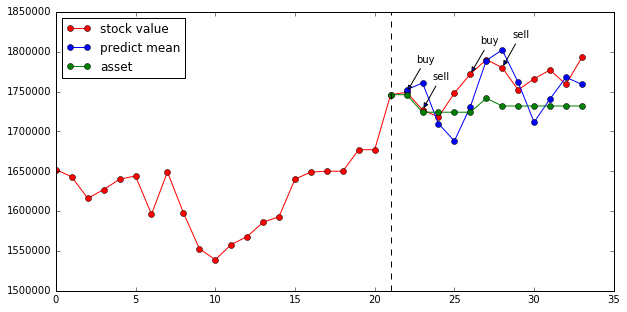

In [14]:
k_rbf = GPy.kern.RBF(input_dim = 1, variance = 1. , lengthscale= 1.) 
k_lin = GPy.kern.Linear(input_dim = 1, variances = 1.)
k_prod = k_lin * k_rbf

bought = False
asset = Y_train[-1]
asset_history = [asset]
pred_mean_history = []
action_history = []
for idx, i in enumerate(X_test):
    if idx == 0:
        prev_stock_price = Y_train[-1]
        model = GPy.models.GPRegression(X_train, Y_train, k_prod ,normalizer=True)
        model.optimize()
    else:
        prev_stock_price = Y_test[idx-1]
        model = GPy.models.GPRegression(np.concatenate((X_train,X_test[:idx]))
                                        , np.concatenate((Y_train,Y_test[:idx]))
                                        , k_prod ,normalizer=True)
        model.optimize()
        
    pred_mean, pred_var = model.predict(np.reshape(X_test[idx],(-1,1))) # GP 가 예측하는 다음날의 mean ,var
    pred_mean_history.append(pred_mean)
    
    cdf = scipy.stats.norm(pred_mean,np.sqrt(pred_var)).cdf # cdf 정의
    p_inc = 1-cdf(prev_stock_price) # 전날 대비 오를 확률

    if p_inc >= 0.6:
#     if pred_mean > prev_stock_price:
        if bought == False:
            action_history.append('buy')
        else:
            action_history.append('hold')
        if idx == 0:
            asset = asset * Y_test[0] / Y_train[-1]
        else:
            asset = asset * Y_test[idx] / Y_test[idx-1]
        asset_history.append(asset)
        bought = True
    else:
        if bought == True:
            action_history.append('sell')
        else:
            action_history.append('hold')
        asset_history.append(asset)
        bought = False       

pred_mean_history = np.array(pred_mean_history).reshape((-1,1))
        
plt.figure(figsize=[10,5])
plt.plot(np.concatenate((X_train,X_test)),np.concatenate((Y_train,Y_test)),'-ro',label='stock value')
plt.plot(X_test,pred_mean_history,'-bo',label='predict mean')
plt.plot(np.concatenate((X_train[-1,None],X_test)),asset_history, '-go' , label='asset')
plt.axvline(X_train[-1], color = 'k' , linestyle='--' )

for idx, action in enumerate(action_history):
    if action == 'buy':
        if idx == 0:
            plt.annotate('buy', xy=(X_test[idx]-1, Y_train[-1]),xytext=(10,30),
                                            textcoords='offset points',  arrowprops=dict(arrowstyle='-|>'))
        else:
            plt.annotate('buy', xy=(X_test[idx]-1, Y_test[idx-1]),xytext=(10,30),
                                            textcoords='offset points',  arrowprops=dict(arrowstyle='-|>'))
    if action == 'sell':
        if idx == 0:
            plt.annotate('sell', xy=(X_test[idx]-1, Y_train[-1]),xytext=(10,30),
                                        textcoords='offset points',  arrowprops=dict(arrowstyle='-|>'))
        else:
            plt.annotate('sell', xy=(X_test[idx]-1, Y_test[idx-1]),xytext=(10,30),
                                        textcoords='offset points',  arrowprops=dict(arrowstyle='-|>'))
plt.legend(loc=2)
